In [1]:
# Importamos los datos
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[: , :2]
Y = iris.target

In [2]:
from sklearn.cluster import KMeans
import numpy as np

In [3]:
# Definimos y realizamos el clustering con k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X)
y = kmeans.predict(X)

In [4]:
# Usaremos estos arreglos para guardar los datos asociados a cada cluster
arr0 = []
arr1 = []

# Repartimos los puntos usando los resultados en y
for i in range(len(y)):
  if y[i] == 1:
    arr0.append(X[i].tolist())
  else:
    arr1.append(X[i].tolist())

In [5]:
# Partimos los arreglos en arreglos con la primera y segunda coordenada, esto para usar la función scatter de plt
arr00 = np.zeros(len(arr0))
arr01 = np.zeros(len(arr0))
for i in range(len(arr0)):
  arr00[i] = arr0[i][0]
for i in range(len(arr0)):
  arr01[i] = arr0[i][1]

arr10 = np.zeros(len(arr1))
arr11 = np.zeros(len(arr1))
for i in range(len(arr1)):
  arr10[i] = arr1[i][0]
for i in range(len(arr1)):
  arr11[i] = arr1[i][1]


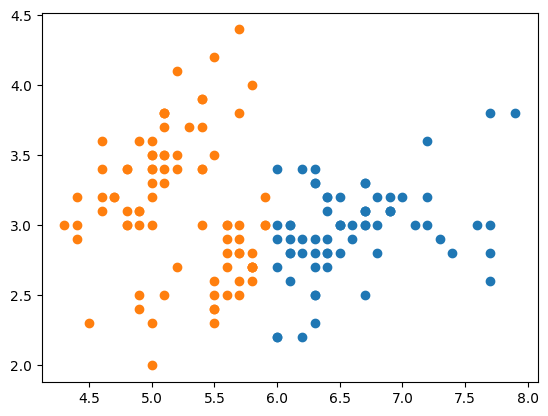

In [6]:
# Graficamos
import matplotlib.pyplot as plt

plt.scatter(arr00, arr01)
plt.scatter(arr10, arr11)

plt.show()

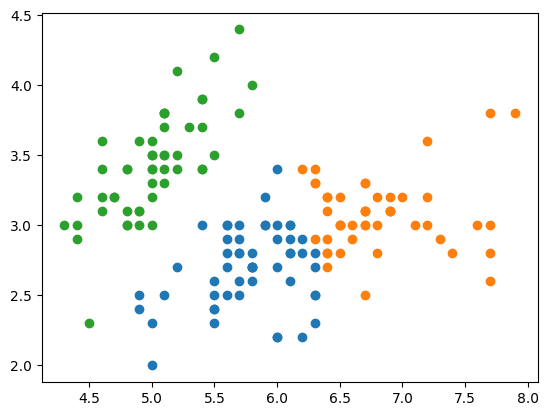

In [7]:
# Hacemos todo lo mismo pero con k=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(X)
K = kmeans.predict(X)

arr0 = []
arr1 = []
arr2 = []


for i in range(len(K)):
  if K[i] == 0:
    arr0.append(X[i].tolist())
  elif K[i] == 1:
    arr1.append(X[i].tolist())
  else:
    arr2.append(X[i].tolist())

arr00 = np.zeros(len(arr0))
arr01 = np.zeros(len(arr0))
for i in range(len(arr0)):
  arr00[i] = arr0[i][0]
for i in range(len(arr0)):
  arr01[i] = arr0[i][1]

arr10 = np.zeros(len(arr1))
arr11 = np.zeros(len(arr1))
for i in range(len(arr1)):
  arr10[i] = arr1[i][0]
for i in range(len(arr1)):
  arr11[i] = arr1[i][1]

arr20 = np.zeros(len(arr2))
arr21 = np.zeros(len(arr2))
for i in range(len(arr2)):
  arr20[i] = arr2[i][0]
for i in range(len(arr2)):
  arr21[i] = arr2[i][1]


plt.scatter(arr00, arr01)
plt.scatter(arr10, arr11)
plt.scatter(arr20, arr21)

plt.show()


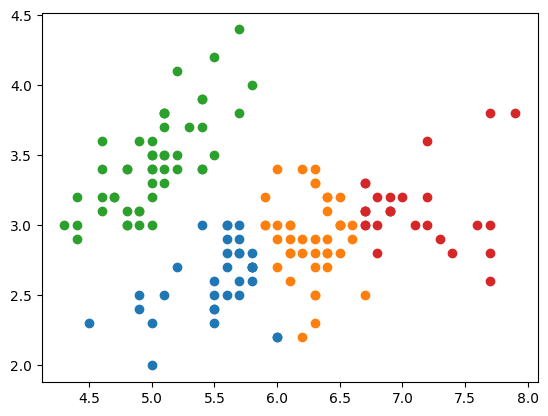

In [8]:
# Ahora con k=4
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
kmeans.fit(X)
K = kmeans.predict(X)

arr0 = []
arr1 = []
arr2 = []
arr3 = []


for i in range(len(K)):
  if K[i] == 0:
    arr0.append(X[i].tolist())
  elif K[i] == 1:
    arr1.append(X[i].tolist())
  elif K[i] == 2:
    arr2.append(X[i].tolist())
  else:
    arr3.append(X[i].tolist())

arr00 = np.zeros(len(arr0))
arr01 = np.zeros(len(arr0))
for i in range(len(arr0)):
  arr00[i] = arr0[i][0]
for i in range(len(arr0)):
  arr01[i] = arr0[i][1]

arr10 = np.zeros(len(arr1))
arr11 = np.zeros(len(arr1))
for i in range(len(arr1)):
  arr10[i] = arr1[i][0]
for i in range(len(arr1)):
  arr11[i] = arr1[i][1]

arr20 = np.zeros(len(arr2))
arr21 = np.zeros(len(arr2))
for i in range(len(arr2)):
  arr20[i] = arr2[i][0]
for i in range(len(arr2)):
  arr21[i] = arr2[i][1]

arr30 = np.zeros(len(arr3))
arr31 = np.zeros(len(arr3))
for i in range(len(arr3)):
  arr30[i] = arr3[i][0]
for i in range(len(arr3)):
  arr31[i] = arr3[i][1]


plt.scatter(arr00, arr01)
plt.scatter(arr10, arr11)
plt.scatter(arr20, arr21)
plt.scatter(arr30, arr31)

plt.show()

In [9]:
def dist(a,b):
  return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


# Esta función nos da el riesgo de un conjunto X con las clases y y centros C de las clases
def Riesgo(X,y,C):
  sum = 0
  for i in range(len(X)):
    sum += dist(X[i],C[y[i]])**2

  return sum

In [10]:
# Este arreglo va a guardar los riesgos con los diferentes k's
Risks = []

# Calculamos riesgos
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
  kmeans.fit(X)
  y = kmeans.predict(X)
  # El atributo cluster_centers_ nos da los centros en el mismo orden que se guardan las clases en y
  Risks.append(Riesgo(X,y,kmeans.cluster_centers_))

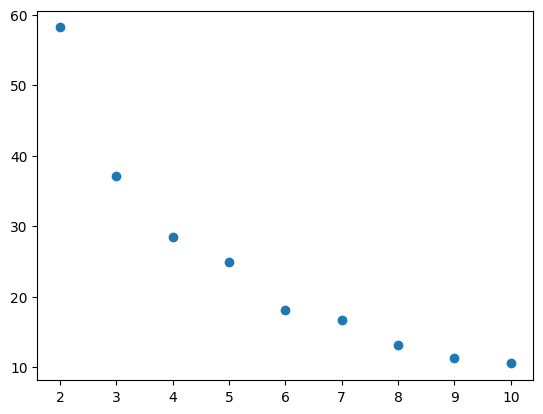

In [11]:
# Graficamos
plt.scatter(np.arange(start=2, stop = 11, step = 1),Risks)

plt.show()

Según el Elbow Method, escogemos k = 6, ya que ahí es donde se forma el úlimo codo más notorio. Vemos que en 8 hay un pequeño codo pero no es tan claro como el de 6. Los puntos desde 6 hasta 10 parecen casi colineales.

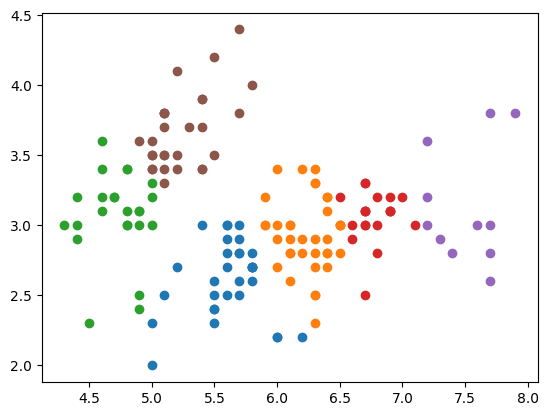

In [12]:
# Hacemos el clustering con k=6
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
kmeans.fit(X)
K = kmeans.predict(X)

arr0 = []
arr1 = []
arr2 = []
arr3 = []
arr4 = []
arr5 = []


for i in range(len(K)):
  if K[i] == 0:
    arr0.append(X[i].tolist())
  elif K[i] == 1:
    arr1.append(X[i].tolist())
  elif K[i] == 2:
    arr2.append(X[i].tolist())
  elif K[i] == 3:
    arr3.append(X[i].tolist())
  elif K[i] == 4:
    arr4.append(X[i].tolist())
  else:
    arr5.append(X[i].tolist())

arr00 = np.zeros(len(arr0))
arr01 = np.zeros(len(arr0))
for i in range(len(arr0)):
  arr00[i] = arr0[i][0]
for i in range(len(arr0)):
  arr01[i] = arr0[i][1]

arr10 = np.zeros(len(arr1))
arr11 = np.zeros(len(arr1))
for i in range(len(arr1)):
  arr10[i] = arr1[i][0]
for i in range(len(arr1)):
  arr11[i] = arr1[i][1]

arr20 = np.zeros(len(arr2))
arr21 = np.zeros(len(arr2))
for i in range(len(arr2)):
  arr20[i] = arr2[i][0]
for i in range(len(arr2)):
  arr21[i] = arr2[i][1]

arr30 = np.zeros(len(arr3))
arr31 = np.zeros(len(arr3))
for i in range(len(arr3)):
  arr30[i] = arr3[i][0]
for i in range(len(arr3)):
  arr31[i] = arr3[i][1]

arr40 = np.zeros(len(arr4))
arr41 = np.zeros(len(arr4))
for i in range(len(arr4)):
  arr40[i] = arr4[i][0]
for i in range(len(arr4)):
  arr41[i] = arr4[i][1]

arr50 = np.zeros(len(arr5))
arr51 = np.zeros(len(arr5))
for i in range(len(arr5)):
  arr50[i] = arr5[i][0]
for i in range(len(arr5)):
  arr51[i] = arr5[i][1]


plt.scatter(arr00, arr01)
plt.scatter(arr10, arr11)
plt.scatter(arr20, arr21)
plt.scatter(arr30, arr31)
plt.scatter(arr40, arr41)
plt.scatter(arr50, arr51)

plt.show()